In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap
#import matplotlib.colors as mcolors
#sc.settings.verbosity = 2
from adjustText import adjust_text

/home/zia/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zia/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zia/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopyth

In [3]:
# output figure parameter
sc.settings.set_figure_params(dpi=100, fontsize=12, dpi_save=400, figsize=(5,5))

In [2]:
#cellenics/Trailmaker processed file
adata = sc.read('/home/zia/Downloads/lc_data_final/LCRMCV1.h5ad')

In [7]:
adata.obs

,Number of mRNA transcripts,Number of genes,Percentage of mitochondrial genes,orig.ident,nCount_RNA,nFeature_RNA,Group,Sex,percent.mt,doublet_scores,doublet_class,emptyDrops_FDR,cells_id,samples,seurat_clusters,ScType-Brain-mouse,Cluster_number,Cell_type
Barcodes,,,,,,,,,,,,,,,,,,
AAAGTCCGTGTTTACG-1_1,3525.952881,2585.0,0.0,LC1_12data,5128.0,2585.0,cGFP,cGFP_Male,2.496100,0.517335,singlet,0.0,15.0,cGFPM2,Cluster 7,GABAergic neurons,7,7 - GABA
CGGGTCATCCGTCAAA-1_1,4145.974121,4431.0,0.0,LC1_12data,12418.0,4431.0,cGFP,cGFP_Male,1.352875,0.038548,singlet,0.0,25.0,cGFPM2,Cluster 1,Glutamatergic neurons,1,1 - GABA
ACACGCGTCCGTGGCA-1_1,2413.477539,1111.0,0.0,LC1_12data,1581.0,1111.0,cGFP,cGFP_Male,2.466793,0.002715,singlet,0.0,26.0,cGFPM2,Cluster 3,Unknown,3,3 - Glut
GTCACTCGTGCCGTTG-1_1,3536.636963,2814.0,0.0,LC1_12data,6081.0,2814.0,cGFP,cGFP_Male,4.571617,0.214010,singlet,0.0,39.0,cGFPM2,Cluster 7,GABAergic neurons,7,7 - GABA
GAAGCCCCACACACTA-1_1,2531.824219,1271.0,0.0,LC1_12data,2047.0,1271.0,cGFP,cGFP_Male,8.304836,0.498029,singlet,0.0,82.0,cGFPM2,Cluster 4,Oligodendrocytes,4,4 - Oligo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGAGTTCAGCTTTGA-1_12,2890.880859,1612.0,0.0,LC1_12data,2647.0,1612.0,cGFP,cGFP_Male,2.908953,0.005829,singlet,0.0,128049.0,cGFPM1,Cluster 17,Neural stem cells,17,17 - Endo
CTACAGACAGGCTTGC-1_12,2290.321533,1028.0,0.0,LC1_12data,1466.0,1028.0,cGFP,cGFP_Male,6.412005,0.000113,singlet,0.0,128109.0,cGFPM1,Cluster 12,Oligodendrocyte precursor cells,12,12 - OPC
TGAATGCTCTCCGCAT-1_12,3290.858398,2183.0,0.0,LC1_12data,4136.0,2183.0,cGFP,cGFP_Male,4.279497,0.273538,singlet,0.0,128127.0,cGFPM1,Cluster 16,Glutamatergic neurons,16,16 - GABA


In [4]:
# change the cluster number
cluster_no = {
    "Cluster 0": "0",
    "Cluster 1": "1",
    "Cluster 2": "2",
    "Cluster 3": "3",
    "Cluster 4": "4",
    "Cluster 5": "5",
    "Cluster 6": "6",
    "Cluster 7": "7",
    "Cluster 8": "8",
    "Cluster 9": "9",
    "Cluster 10": "10",
    "Cluster 11": "11",
    "Cluster 12": "12",
    "Cluster 13": "13",
    "Cluster 14": "14",
    "Cluster 15": "15",
    "Cluster 16": "16",
    "Cluster 17": "17",
    "Cluster 18": "18",
    "Cluster 19": "19",
    "Cluster 20": "20",
    "Cluster 21": "21",
    "Cluster 22": "22",
    "Cluster 23": "23",
    "Cluster 24": "24",
}

In [5]:
#defining the cluster to cell types
celltypes = {
    "Cluster 0": "0 - Glut",
    "Cluster 1": "1 - GABA",
    "Cluster 2": "2 - Glut",
    "Cluster 3": "3 - Glut",
    "Cluster 4": "4 - Oligo",
    "Cluster 5": "5 - GABA",
    "Cluster 6": "6 - Oligo",
    "Cluster 7": "7 - GABA",
    "Cluster 8": "8 - GABA",
    "Cluster 9": "9 - Astro",
    "Cluster 10": "10 - Micro",
    "Cluster 11": "11 - GABA",
    "Cluster 12": "12 - OPC",
    "Cluster 13": "13 - Oligo",
    "Cluster 14": "14 - Undefined",
    "Cluster 15": "15 - Astro",
    "Cluster 16": "16 - GABA",
    "Cluster 17": "17 - Endo",
    "Cluster 18": "18 - NA",
    "Cluster 19": "19 - Endo",
    "Cluster 20": "20 - Micro",
    "Cluster 21": "21 - GABA",
    "Cluster 22": "22 - Epen",
    "Cluster 23": "23 - LQC",
    "Cluster 24": "24 - LQC",
}

In [6]:
#cluster number and cell type column added to the data
adata.obs['Cluster_number'] = adata.obs.seurat_clusters.map(cluster_no)
adata.obs['Cell_type'] = adata.obs.seurat_clusters.map(celltypes)

In [9]:
#legend outside the plot
def one_col_lgd(umap):
    legend = umap.legend(bbox_to_anchor=[1.00, 0.5],
                         loc='center left', ncol=1, prop={'size': 7})
    
    # Set legend frame alpha to make it transparent
    legend.get_frame().set_alpha(0.0)
    
    for handle in legend.legend_handles:
        handle.set_sizes([25.0])
    return legend

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argu

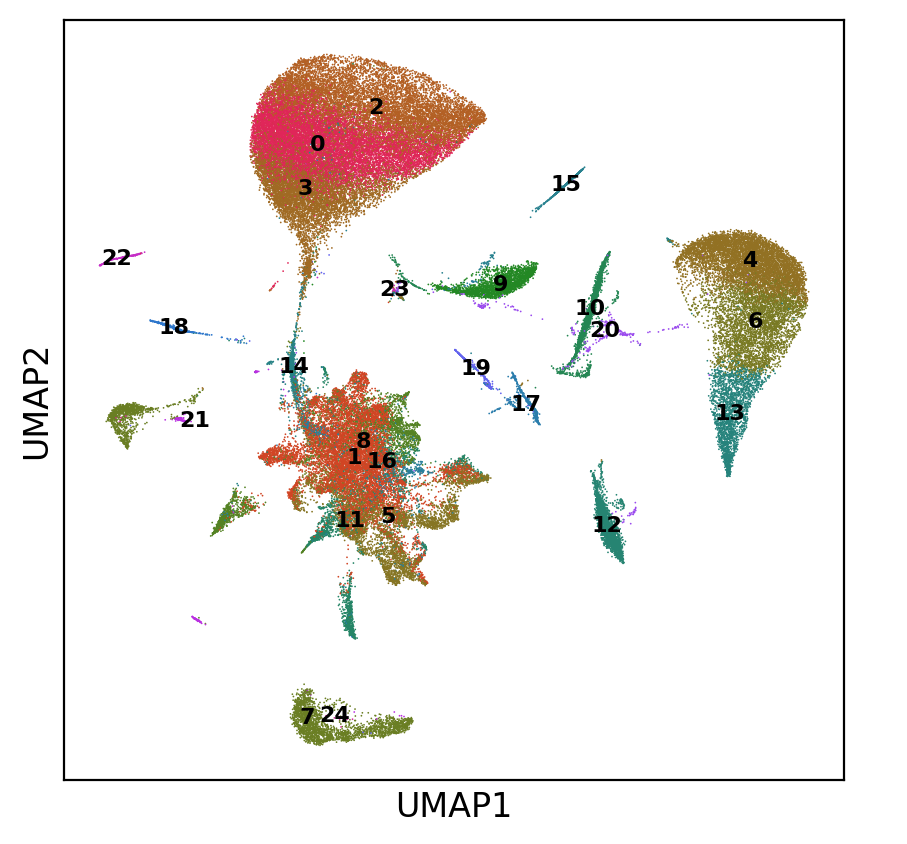

In [28]:
CT_umap = sc.pl.umap(adata, color=['Cluster_number'],
                    show=False, palette=sns.husl_palette(n_colors=26, l=0.5),
                    legend_fontsize=8, legend_loc='on data', frameon=True, title='')
lgd = one_col_lgd(CT_umap)
fig = CT_umap.get_figure()
fig.patch.set_alpha(0.0) 
fig.set_size_inches(5, 5)
fig.savefig('/home/zia/Downloads/lc_final/cluster_no.pdf', dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight', transparent=True)

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


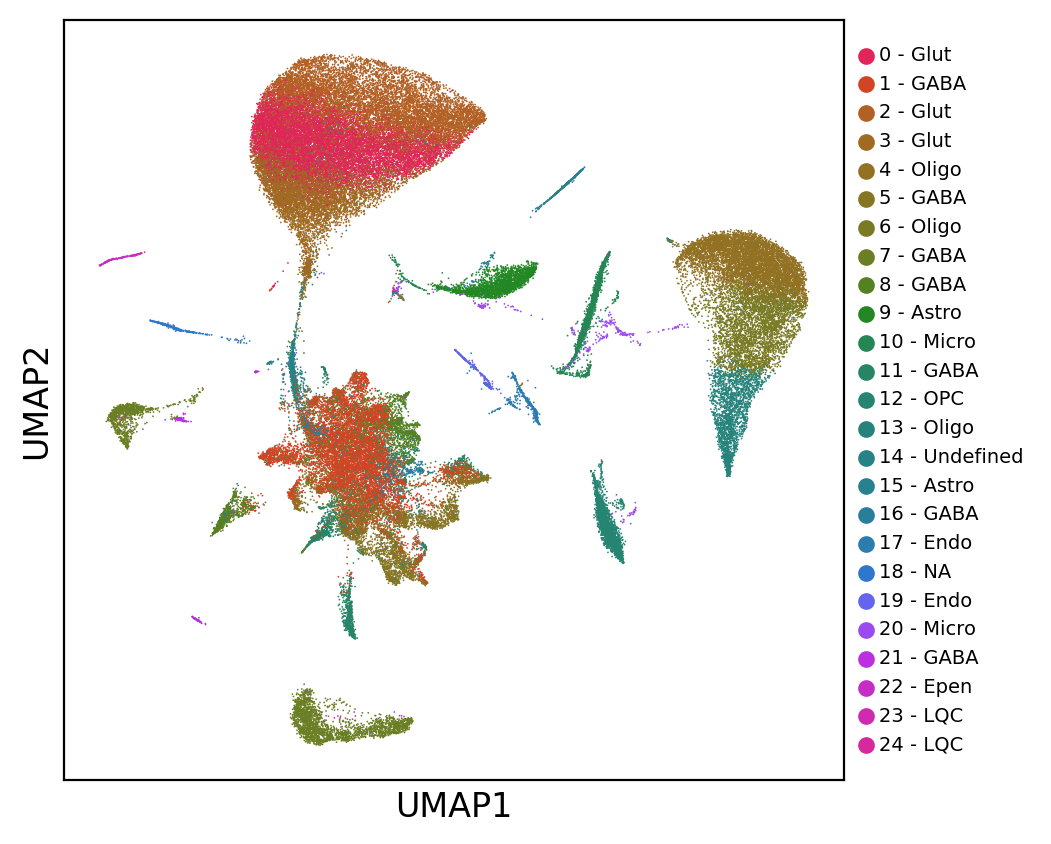

In [10]:
# cell type
CT_umap = sc.pl.umap(adata, color=['Cell_type'],
                    show=False, palette=sns.husl_palette(n_colors=26, l=0.5),
                    legend_fontsize=12, frameon=True, title='')
lgd = one_col_lgd(CT_umap)
fig = CT_umap.get_figure()
fig.patch.set_alpha(0.0)
fig.set_size_inches(5, 5)
fig.savefig('/home/zia/Downloads/lc_final/cell_type.pdf', dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight', transparent=True)